<a href="https://colab.research.google.com/github/varshithakk/Brazilian-E-commerce-dataset-by-olist/blob/main/brazilian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =====================
# 1. Install & Import Libraries
# =====================
import pandas as pd

# =====================
# 2. Load CSV Files (Upload in Colab or use Path)
# =====================
# If uploading from local machine:
from google.colab import files



# Read CSVs into DataFrames
orders = pd.read_csv("olist_orders_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")

# =====================
# 3. Merge DataFrames (like in Excel Power Query)
# =====================
# Fix the column name in the orders DataFrame before merging
orders.rename(columns={'order_approved_atorder_approved_at': 'order_approved_at'}, inplace=True)

# Merge Orders + Customers (on customer_id)
df = pd.merge(orders, customers, on='customer_id', how='left')

# Merge with Order Items (on order_id)
df = pd.merge(df, order_items, on='order_id', how='left')

# =====================
# 4. Data Cleaning
# =====================
# Convert date columns to datetime
date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate delivery_duration_days
df['delivery_duration_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Calculate order_value = price + freight_value
df['order_value'] = df['price'] + df['freight_value']

# =====================
# 5. Handle Missing Values
# =====================
df['customer_city'] = df['customer_city'].fillna("Unknown")
df['customer_state'] = df['customer_state'].fillna("Unknown")
df['price'] = df['price'].fillna(0)
df['freight_value'] = df['freight_value'].fillna(0)

# =====================
# 6. Create KPI Metrics
# =====================
total_sales = df['order_value'].sum()
total_orders = df['order_id'].nunique()  # count distinct orders
avg_delivery_time = df['delivery_duration_days'].mean()

print("===== KPIs =====")
print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Delivery Time (days): {avg_delivery_time:.1f}")

# =====================
# 7. Example Aggregations (like PivotTables in Excel)
# =====================

# Sales by Month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
sales_by_month = df.groupby('order_month')['order_value'].sum().reset_index()

# Sales by State
sales_by_state = df.groupby('customer_state')['order_value'].sum().reset_index().sort_values('order_value', ascending=False)

# Average Delivery Time by State
avg_delivery_by_state = df.groupby('customer_state')['delivery_duration_days'].mean().reset_index()

# Order Status Distribution
status_dist = df.groupby('order_status')['order_id'].count().reset_index()

print("\nSales by Month:")
print(sales_by_month.head())

print("\nTop States by Sales:")
print(sales_by_state.head())

print("\nAverage Delivery Time by State:")
print(avg_delivery_by_state.head())

print("\nOrder Status Distribution:")
print(status_dist.head())

# =====================
# 8. Optional: Save Final Master Data to CSV
# =====================
df.to_csv("olist_master_dataset.csv", index=False)
print("\nMaster dataset saved as olist_master_dataset.csv")

===== KPIs =====
Total Sales: 15,843,553.24
Total Orders: 99,441
Average Delivery Time (days): 121.7

Sales by Month:
  order_month  order_value
0     2016-02       109.34
1     2016-03       595.14
2     2016-04     11431.71
3     2016-05      9721.00
4     2016-06      9131.23

Top States by Sales:
   customer_state  order_value
25             SP   5921678.12
18             RJ   2129681.98
10             MG   1856161.49
22             RS    885826.76
17             PR    800935.44

Average Delivery Time by State:
  customer_state  delivery_duration_days
0             AC               52.250000
1             AL              -15.020408
2             AM              -29.142857
3             AP              -49.230769
4             BA               25.142857

Order Status Distribution:
  order_status  order_id
0     approved         3
1     canceled       706
2      created         5
3    delivered    110197
4     invoiced       361

Master dataset saved as olist_master_dataset.csv


===== 📊 KPI METRICS =====
💰 Total Sales: 15,843,553.24
📦 Total Orders: 99,441
⏱️ Average Delivery Time (days): 121.7


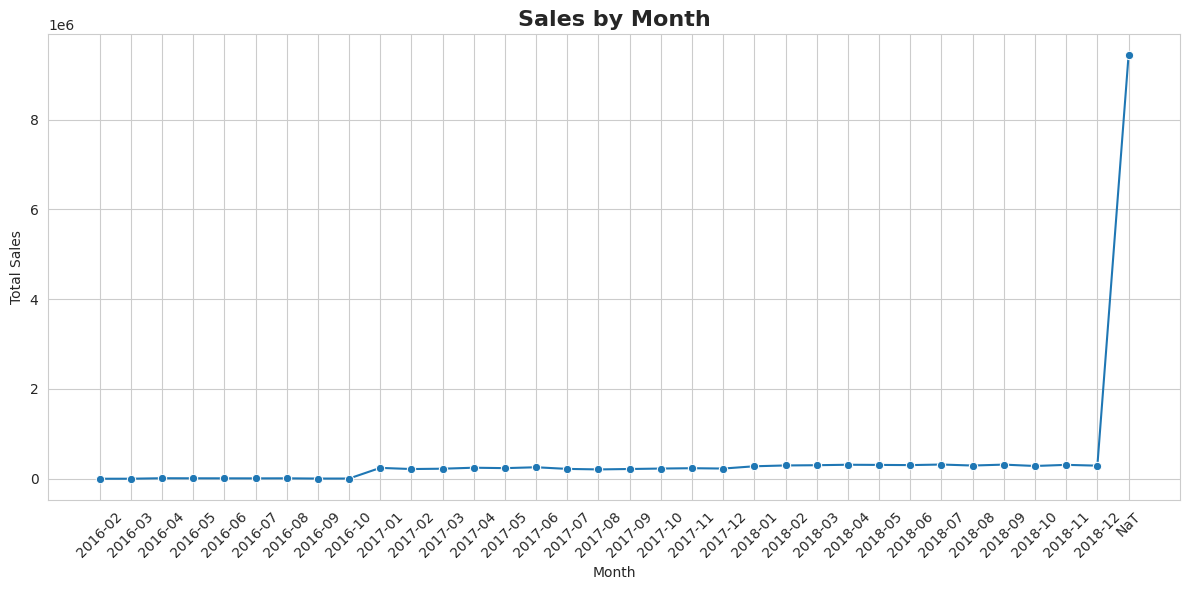

/tmp/ipython-input-1891445874.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_state, x='customer_state', y='order_value', palette='viridis')


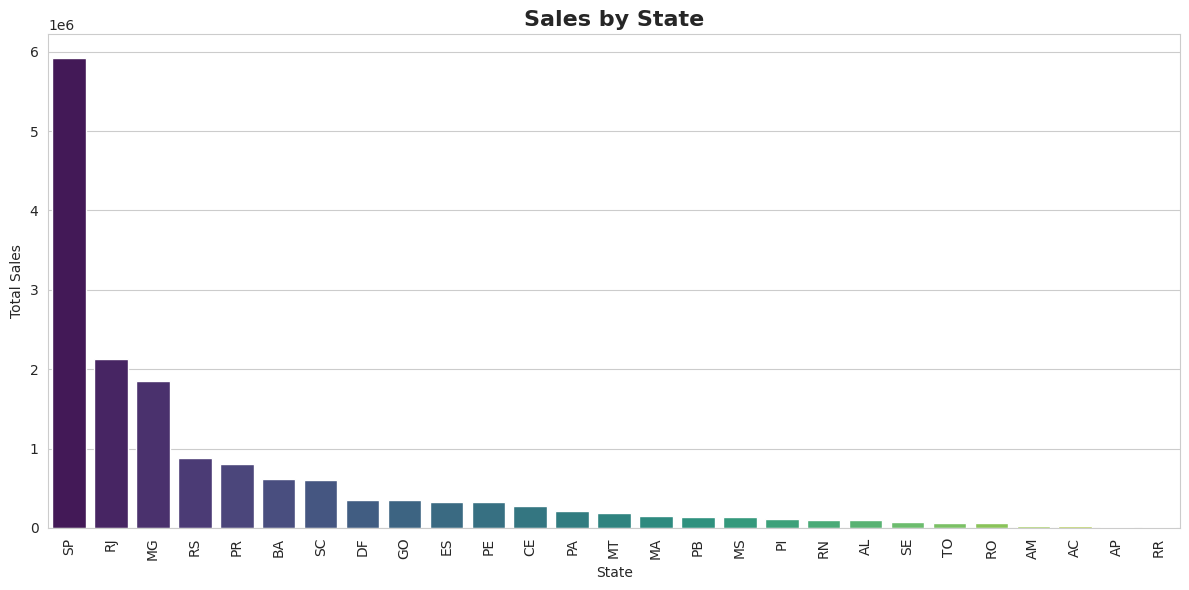

/tmp/ipython-input-1891445874.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delivery_by_state, x='customer_state', y='delivery_duration_days', palette='magma')


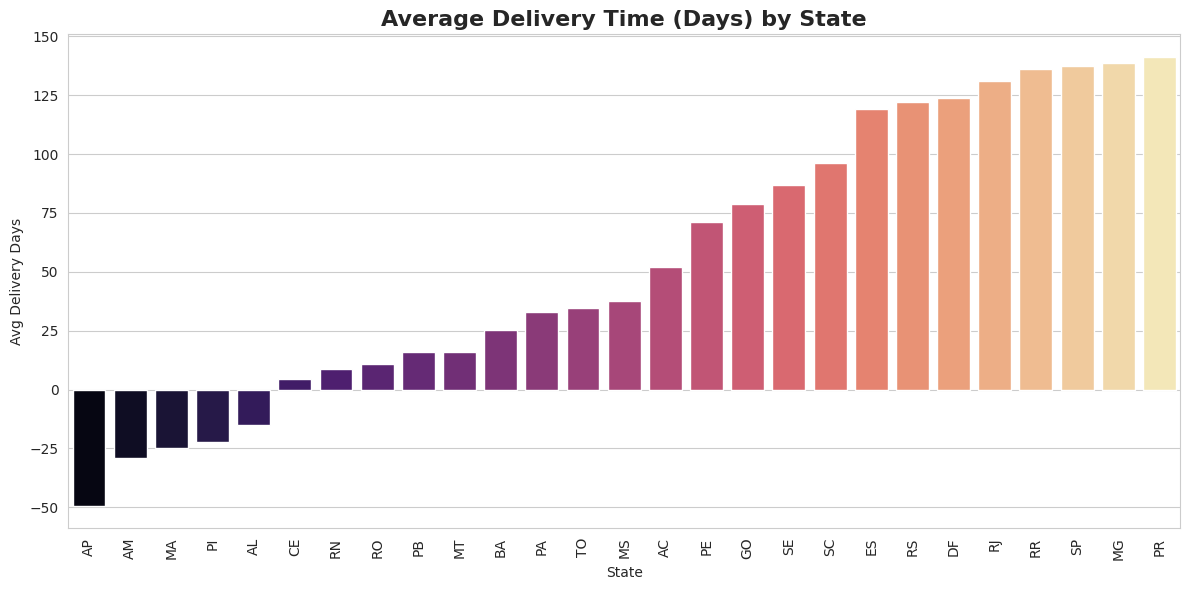

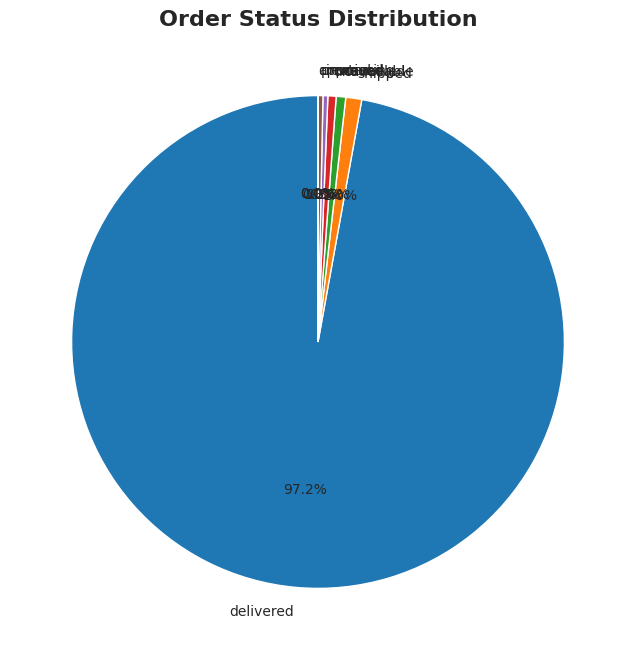


✅ Merged dataset saved as 'olist_master_dataset.csv' in Colab.


In [4]:
# =====================
# 1. INSTALL & IMPORT LIBRARIES
# =====================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# =====================
# 2. UPLOAD & LOAD CSV FILES
# =====================


# Load into DataFrames
orders = pd.read_csv("olist_orders_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")

# =====================
# 3. MERGE DATA (like Excel Power Query)
# =====================
# Fix the column name in the orders DataFrame before merging
orders.rename(columns={'order_approved_atorder_approved_at': 'order_approved_at'}, inplace=True)

df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, order_items, on='order_id', how='left')

# =====================
# 4. CLEAN & TRANSFORM DATA
# =====================
# Convert to datetime
date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Delivery duration
df['delivery_duration_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Order value
df['order_value'] = df['price'] + df['freight_value']

# Handle missing
df['customer_city'] = df['customer_city'].fillna("Unknown")
df['customer_state'] = df['customer_state'].fillna("Unknown")
df['price'] = df['price'].fillna(0)
df['freight_value'] = df['freight_value'].fillna(0)

# =====================
# 5. KPI CALCULATIONS
# =====================
total_sales = df['order_value'].sum()
total_orders = df['order_id'].nunique()
avg_delivery_time = df['delivery_duration_days'].mean()

print("===== 📊 KPI METRICS =====")
print(f"💰 Total Sales: {total_sales:,.2f}")
print(f"📦 Total Orders: {total_orders:,}")
print(f"⏱️ Average Delivery Time (days): {avg_delivery_time:.1f}")

# =====================
# 6. EDA AGGREGATIONS (Like PivotTables)
# =====================
# Sales by Month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
sales_by_month = df.groupby('order_month')['order_value'].sum().reset_index()

# Sales by State
sales_by_state = df.groupby('customer_state')['order_value'].sum().reset_index().sort_values('order_value', ascending=False)

# Avg Delivery Time by State
avg_delivery_by_state = df.groupby('customer_state')['delivery_duration_days'].mean().reset_index().sort_values('delivery_duration_days')

# Order Status Distribution
status_dist = df.groupby('order_status')['order_id'].count().reset_index().sort_values('order_id', ascending=False)

# =====================
# 7. VISUALS (Recreating Excel Dashboard Charts)
# =====================

# ----- Sales by Month -----
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_month, x='order_month', y='order_value', marker='o')
plt.xticks(rotation=45)
plt.title("Sales by Month", fontsize=16, fontweight='bold')
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# ----- Sales by State -----
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_state, x='customer_state', y='order_value', palette='viridis')
plt.title("Sales by State", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel("Total Sales")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# ----- Average Delivery Time by State -----
plt.figure(figsize=(12,6))
sns.barplot(data=avg_delivery_by_state, x='customer_state', y='delivery_duration_days', palette='magma')
plt.title("Average Delivery Time (Days) by State", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel("Avg Delivery Days")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# ----- Order Status Distribution -----
plt.figure(figsize=(8,8))
plt.pie(status_dist['order_id'], labels=status_dist['order_status'], autopct='%1.1f%%', startangle=90)
plt.title("Order Status Distribution", fontsize=16, fontweight='bold')
plt.show()

# =====================
# 8. SAVE MASTER DATASET
# =====================
df.to_csv("olist_master_dataset.csv", index=False)
print("\n✅ Merged dataset saved as 'olist_master_dataset.csv' in Colab.")

In [5]:
# =====================
# 1. Install & Import Packages
# =====================
!pip install plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# =====================
# 2. Load Merged Dataset
# =====================
# If loading the merged file saved earlier from Colab:
from google.colab import files


df = pd.read_csv("olist_master_dataset.csv")

# Ensure date columns are datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')

# =====================
# 3. KPI Calculations
# =====================
total_sales = df['order_value'].sum()
total_orders = df['order_id'].nunique()
avg_delivery_time = df['delivery_duration_days'].mean()

print("===== 📊 KPI METRICS =====")
print(f"💰 Total Sales: {total_sales:,.2f}")
print(f"📦 Total Orders: {total_orders:,}")
print(f"⏱️ Average Delivery Time (days): {avg_delivery_time:.1f}")

# =====================
# 4. INSIGHTS SUMMARY
# =====================
top_states = df.groupby('customer_state')['order_value'].sum().sort_values(ascending=False).head(3)
peak_month = df.groupby(df['order_purchase_timestamp'].dt.month)['order_value'].sum().idxmax()
fastest_states = df.groupby('customer_state')['delivery_duration_days'].mean().sort_values().head(2)
slowest_states = df.groupby('customer_state')['delivery_duration_days'].mean().sort_values(ascending=False).head(2)
status_counts = df['order_status'].value_counts(normalize=True) * 100

print("\n===== 📄 INSIGHTS & CONCLUSION =====")
print(f"- Total Sales: {total_sales:,.2f}")
print(f"- Total Orders: {total_orders:,}")
print(f"- Average Delivery Time: {avg_delivery_time:.1f} days")
print(f"- Top 3 States by Sales: {', '.join(top_states.index)}")
print(f"- Peak Sales Month: {peak_month} (Likely seasonal/holiday effect)")
print(f"- Fastest Delivery States: {', '.join(fastest_states.index)}")
print(f"- Slowest Delivery States: {', '.join(slowest_states.index)}")
print(f"- Delivered orders: {status_counts.get('delivered',0):.1f}%, Canceled orders: {status_counts.get('canceled',0):.1f}%")

# =====================
# 5. Interactive Charts
# =====================

# Sales by Month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
sales_by_month = df.groupby('order_month')['order_value'].sum().reset_index()
fig1 = px.line(sales_by_month, x='order_month', y='order_value', title="📅 Sales by Month", markers=True)
fig1.show()

# Sales by State
sales_by_state = df.groupby('customer_state')['order_value'].sum().reset_index().sort_values('order_value', ascending=False)
fig2 = px.bar(sales_by_state, x='customer_state', y='order_value', title="📍 Sales by State", text_auto='.2s')
fig2.show()

# Average Delivery Time by State
avg_delivery_by_state = df.groupby('customer_state')['delivery_duration_days'].mean().reset_index()
fig3 = px.bar(avg_delivery_by_state, x='customer_state', y='delivery_duration_days', title="🚚 Avg Delivery Time by State", text_auto='.1f')
fig3.show()

# Order Status Distribution
status_dist = df['order_status'].value_counts().reset_index()
status_dist.columns = ['order_status', 'count']
fig4 = px.pie(status_dist, names='order_status', values='count', title="📦 Order Status Distribution", hole=0.4)
fig4.show()


===== 📊 KPI METRICS =====
💰 Total Sales: 15,843,553.24
📦 Total Orders: 99,441
⏱️ Average Delivery Time (days): 121.7

===== 📄 INSIGHTS & CONCLUSION =====
- Total Sales: 15,843,553.24
- Total Orders: 99,441
- Average Delivery Time: 121.7 days
- Top 3 States by Sales: SP, RJ, MG
- Peak Sales Month: 6.0 (Likely seasonal/holiday effect)
- Fastest Delivery States: AP, AM
- Slowest Delivery States: PR, MG
- Delivered orders: 97.2%, Canceled orders: 0.6%
